<a href="https://colab.research.google.com/github/SarangWanodei20/Sa/blob/main/practice_final_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 7: Get Basic Sales Summary from a Tiny SQLite Database using Python

Create the Database (if not already created)

In [ ]:
import sqlite3

# Connect to SQLite database (creates file if not exists)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create a simple sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
''')

# Insert some sample sales data
sample_data = [
    ('Apple', 10, 0.5),
    ('Banana', 5, 0.2),
    ('Orange', 8, 0.4),
    ('Apple', 6, 0.5),
    ('Banana', 7, 0.2),
    ('Orange', 3, 0.4),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()


Run SQL Query and Load into Pandas

In [ ]:
import pandas as pd

# Query to summarize sales
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Load query results into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Print the DataFrame
print(df)


  product  total_qty  revenue
0   Apple         64     32.0
1  Banana         48      9.6
2  Orange         44     17.6


Plot a Simple Bar Chart

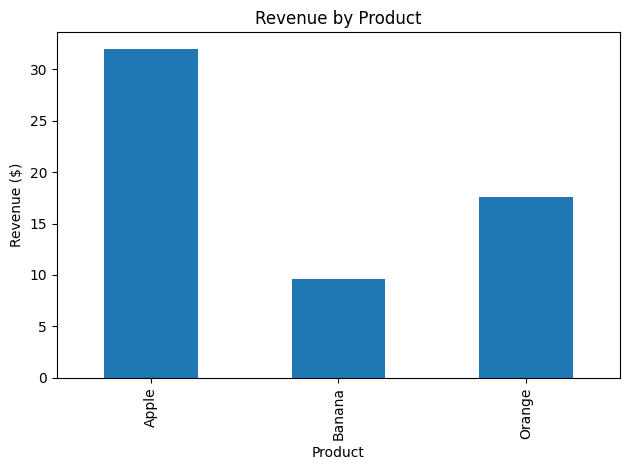

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for revenue by product
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title('Revenue by Product')
plt.ylabel('Revenue ($)')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

# Save the chart (optional)
# plt.savefig("sales_chart.png")


INTERVIEW QUESTIONS

 How did you connect Python to a database?

I used sqlite3.connect("sales_data.db") to connect to a local SQLite file.

What SQL query did you run?

I ran a SELECT statement to get total quantity and revenue per product using SUM() and GROUP BY.

 What does GROUP BY do?

It groups rows by the product name so we can aggregate data like totals for each unique product.

 How did you calculate revenue?

By using SUM(quantity * price) inside the SQL query.

 How did you visualize the result?

I used matplotlib to create a bar chart showing revenue by product.

 What does pandas do in your code?

pandas.read_sql_query() loads the SQL query result into a DataFrame, making it easier to manipulate and plot.

What’s the benefit of using SQL inside Python?

It combines the power of SQL querying with Python’s visualization and data analysis capabilities.

Could you run the same SQL query directly in DB Browser for SQLite?

Yes, the same query works directly in DB Browser and would return similar results.